In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0, '\python\Desktop_Rehab')
import ftsensor
import time

In [14]:
duration = 20
sensor = ftsensor.ftsensor(calibration_file_path="..\FT44764\FT44764.cal")
sensor.start_task()
sensor.set_bias()

readings = []
current_time = time.time()
while time.time() < current_time+duration:
    readings.append(sensor.read_ft()[0])

sensor.stop_task()


In [15]:
len(readings)

1281

In [16]:
FOLDER_DIR = "..\Joey\Record_Data"

demo_df = pd.read_csv(FOLDER_DIR+"\Demo\Sensor_1.csv")
demo_df.drop(['Frequency = 1000',
       'Averaging Level = 16', 'F/T Serial Number = FT44764',
       'Time Started = 27-Jun-23 5:48:45 PM'], axis=1, inplace=True)
demo_df


,Force X (N),Force Y (N),Force Z (N),Torque X (N-m),Torque Y (N-m),Torque Z (N-m)
0,-0.008168,-0.019754,0.030952,0.000056,0.000159,0.001073
1,0.010138,-0.037941,-0.004566,-0.000052,0.001158,-0.000193
2,0.003470,-0.002783,0.038016,-0.000167,0.001182,0.000680
3,-0.001473,-0.037460,0.010951,-0.000546,0.000496,-0.000037
4,0.021586,-0.009614,0.030545,-0.000073,-0.000484,0.001185
...,...,...,...,...,...,...
1249,0.246801,-0.054784,0.114833,0.001659,0.003716,0.001219
1250,0.012203,-0.029601,-0.107837,-0.000801,-0.001214,-0.000355
1251,0.051332,0.016094,0.075396,-0.000742,0.001739,0.000716
1252,0.003734,-0.036587,-0.013362,0.000408,-0.002014,0.000313


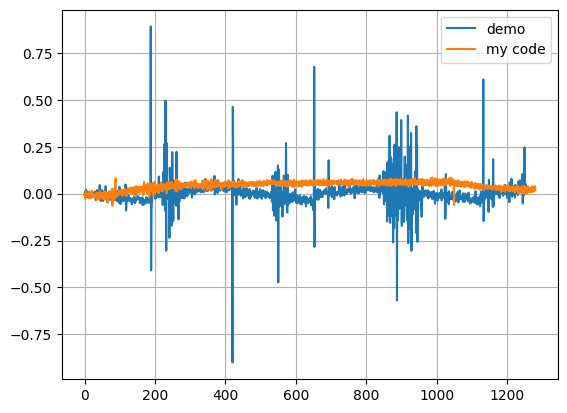

In [17]:
X1 = demo_df.index
Y1 = demo_df["Force X (N)"]

X2 = range(len(readings))
Y2 = readings

plt.plot(X1, Y1, label="demo")
plt.plot(X2, Y2, label="my code")

plt.grid()
plt.legend()
